<a href="https://colab.research.google.com/github/allispaul/audiobot/blob/main/models/GTZAN_Fastai_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision.all import *

import os
import numpy



# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
path = '/content/drive/MyDrive/Colab Notebooks/Erdos Institute Boot Camp/Audiobots/Data/GTZAN/log'

In [17]:
# When this shit works out, god we love fastai
# Not when their API conflicts with Transformers API 😠
# More comments should have emojis, shouldn't they 🤔

songs = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=GrandparentSplitter(train_name='train', valid_name='test'),
                 get_y=parent_label)

dls = songs.dataloaders(path)

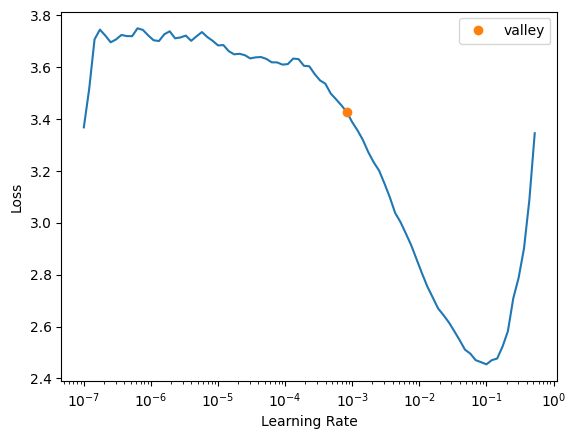

In [18]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
lr_v = learn.lr_find()

Straight from [Fastbook](https://github.com/fastai/fastbook/blob/master/05_pet_breeds.ipynb)

In [19]:
learn.fit_one_cycle(10, lr_v.valley)

epoch,train_loss,valid_loss,error_rate,time
0,3.451293,3.047626,0.820000,00:23
1,2.969741,2.396697,0.670000,00:06
2,2.383658,1.834914,0.590000,00:07
3,1.892586,1.350716,0.430000,00:07
4,1.508922,1.209482,0.370000,00:06
5,1.226215,1.148358,0.370000,00:07
6,1.018090,1.100979,0.350000,00:06
7,0.852934,1.101644,0.330000,00:08
8,0.724137,1.107283,0.330000,00:06
9,0.630655,1.110713,0.330000,00:08


In [20]:
learn2 = vision_learner(dls, resnet34, metrics=error_rate)
learn2.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,2.822253,2.018264,0.580000,00:07
1,1.868268,4.700915,0.640000,00:06
2,1.433096,2.921772,0.630000,00:07
3,1.196302,3.439623,0.530000,00:06
4,0.953702,2.140470,0.380000,00:08
5,0.774946,1.217608,0.280000,00:06
6,0.605960,1.198860,0.260000,00:08
7,0.478057,1.107874,0.290000,00:07
8,0.369840,1.072178,0.250000,00:07
9,0.289398,1.065300,0.270000,00:07


In [21]:
learn.unfreeze()
learn2.unfreeze()

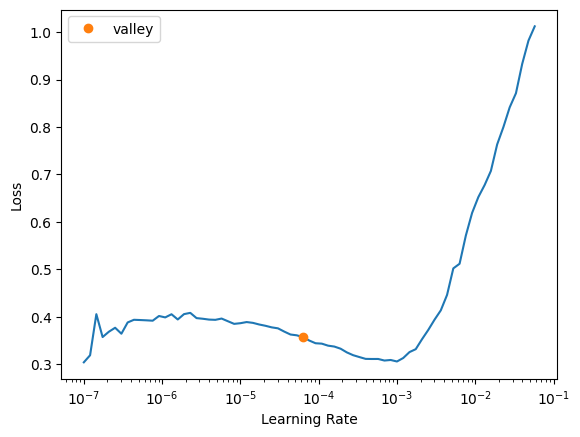

In [22]:
lr_v = learn.lr_find()

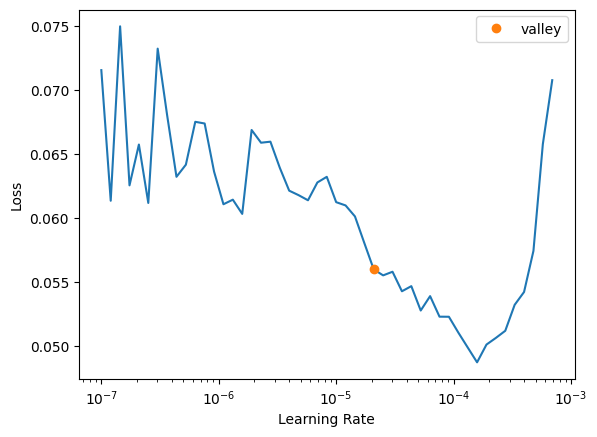

In [23]:
lr_v2 = learn2.lr_find()

In [24]:
learn.fit_one_cycle(12, lr_max=slice(lr_v.valley/10,lr_v.valley*00))

epoch,train_loss,valid_loss,error_rate,time
0,0.373268,1.106002,0.340000,00:07
1,0.403399,1.108729,0.350000,00:08
2,0.400731,1.115979,0.330000,00:07
3,0.389574,1.110794,0.320000,00:08
4,0.365892,1.103118,0.320000,00:07
5,0.356781,1.094674,0.320000,00:08
6,0.354059,1.103873,0.310000,00:08
7,0.351966,1.090091,0.320000,00:08
8,0.335584,1.105876,0.330000,00:08
9,0.331891,1.097385,0.320000,00:07


In [25]:
learn2.fit_one_cycle(12, lr_max=slice(lr_v2.valley/5,lr_v2.valley*20))

epoch,train_loss,valid_loss,error_rate,time
0,0.073923,1.035980,0.250000,00:07
1,0.055408,0.960454,0.240000,00:09
2,0.044508,0.993308,0.240000,00:08
3,0.043656,1.042639,0.220000,00:07
4,0.038433,1.045466,0.240000,00:08
5,0.036436,1.094698,0.240000,00:07
6,0.034035,1.038263,0.240000,00:08
7,0.030122,1.011610,0.220000,00:09
8,0.027142,1.003081,0.250000,00:08
9,0.023075,0.968586,0.240000,00:08


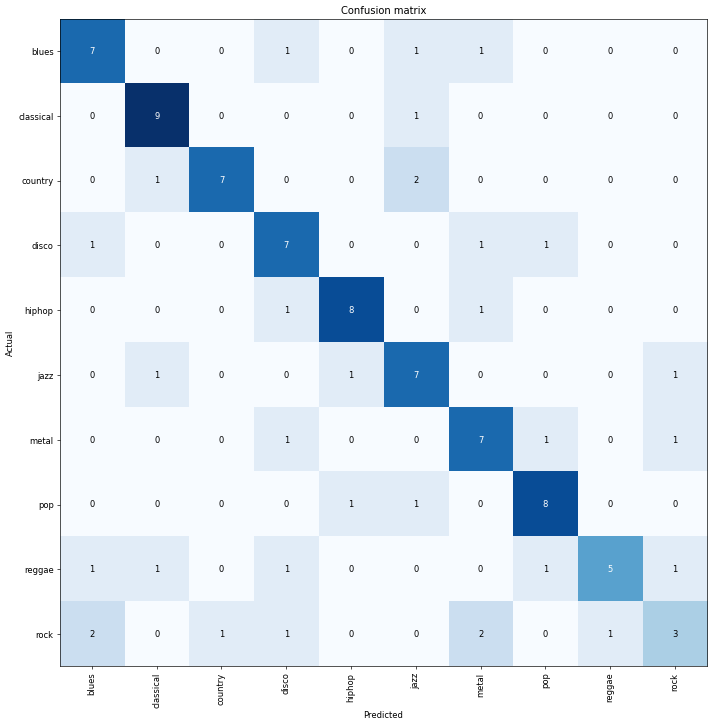

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

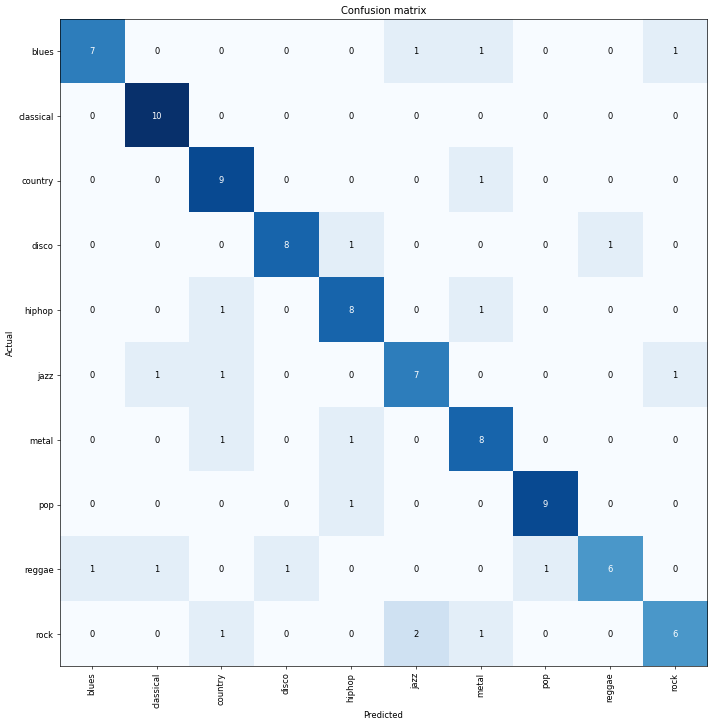

In [28]:
interp = ClassificationInterpretation.from_learner(learn2)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

Getting better. I think the next way forward is to start including regularization techniques (adding dropout)?
I don't want to start morphing the images and such, but I think making larger spectrograms and cropping could work!
